# Watershed - RBC Challenge

In [10]:
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from skimage.segmentation import watershed

import cv2
import matplotlib.pyplot as plt
import numpy as np


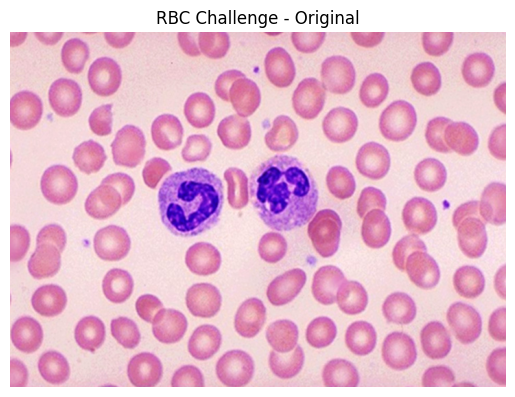

In [11]:
image = cv2.imread('images/rbc.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

title = 'RBC Challenge'

plt.imshow(image)
plt.title(f'{title} - Original')
plt.axis('off')
plt.show()

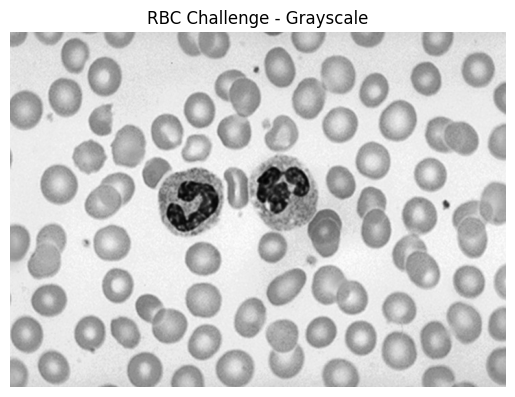

In [12]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray_image, cmap='gray')
plt.title(f'{title} - Grayscale')
plt.axis('off')
plt.show()

Thresholded value by Otsu's Method: 186.0


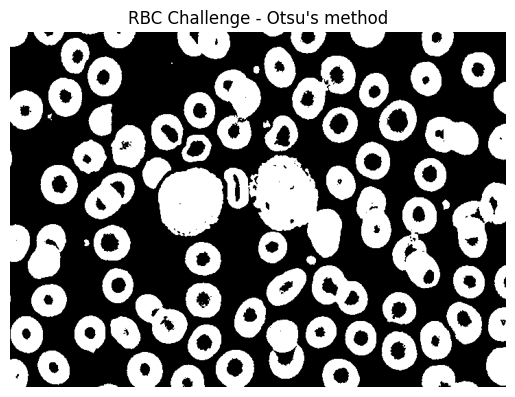

In [13]:
threshold_value, thresholded_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

print(f'Thresholded value by Otsu\'s Method: {threshold_value}')

plt.imshow(thresholded_image, cmap='gray')
plt.title(f'{title} - Otsu\'s method')
plt.axis('off')
plt.show()

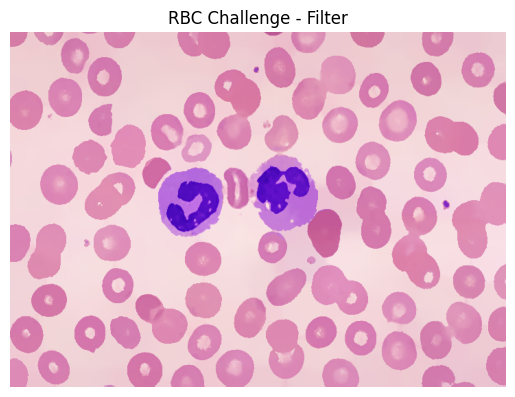

In [20]:
filter_image = cv2.pyrMeanShiftFiltering(image, 20, 40)

plt.imshow(filter_image, cmap='gray')
plt.title(f'{title} - Filter')
plt.axis('off')
plt.show()

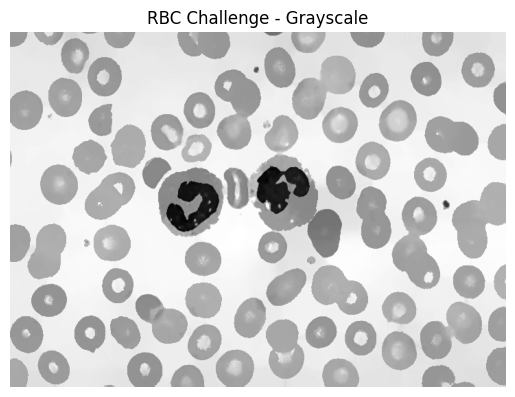

In [21]:
gray_image = cv2.cvtColor(filter_image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray_image, cmap='gray')
plt.title(f'{title} - Grayscale')
plt.axis('off')
plt.show()

Thresholded value by Otsu's Method: 189.0


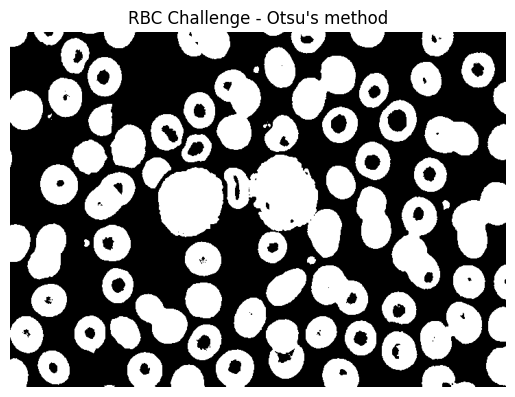

In [22]:
threshold_value, thresholded_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

print(f'Thresholded value by Otsu\'s Method: {threshold_value}')

plt.imshow(thresholded_image, cmap='gray')
plt.title(f'{title} - Otsu\'s method')
plt.axis('off')
plt.show()

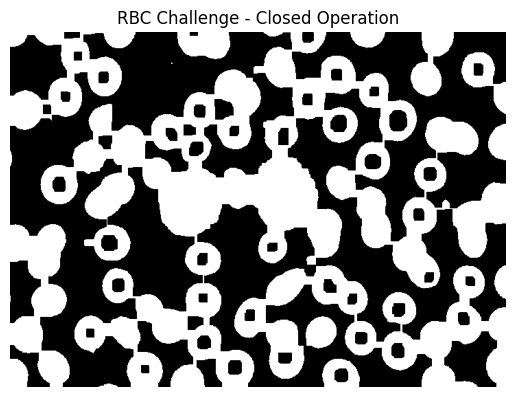

In [14]:
kernel = np.ones((3, 3), np.uint8)
dilated_image = cv2.dilate(thresholded_image, kernel, iterations=2)
eroded_image = cv2.erode(dilated_image, kernel, iterations=2)

closed_image = eroded_image.copy()

plt.imshow(closed_image, cmap='gray')
plt.title(f'{title} - Closed Operation')
plt.axis('off')
plt.show()

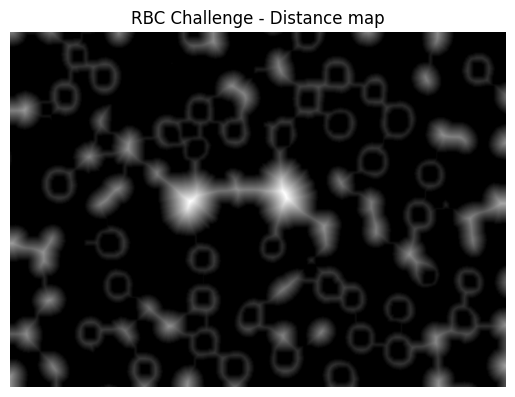

In [15]:
distance_map = ndi.distance_transform_edt(closed_image)

plt.imshow(distance_map, cmap='gray')
plt.title(f'{title} - Distance map')
plt.axis('off')
plt.show()

In [16]:
local_max = peak_local_max(distance_map, indices=False, min_distance=20, labels=closed_image)

local_max

/tmp/ipykernel_18213/2357953481.py:1: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_max = peak_local_max(distance_map, indices=False, min_distance=20, labels=closed_image)


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

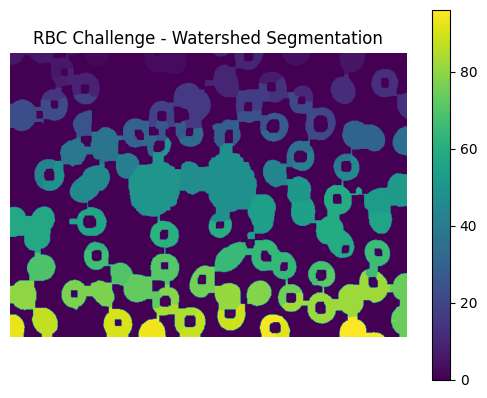

In [17]:
# Get the central pixel of each object.
markers = ndi.label(local_max, structure=np.ones((3,3)))[0]
# Get the watershed segmentation.
labels = watershed(-distance_map, markers, mask=closed_image)

plt.imshow(labels)
plt.title(f'{title} - Watershed Segmentation')
plt.axis('off')
plt.colorbar()
plt.show()